## Imports

In [ ]:
# Basic Imports
import sys

import pandas            as pd
import numpy             as np
import scipy.stats       as stats

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Data Reading
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

# Custom Modules
sys.path.append('/content/drive/MyDrive/Data Sets/')
import graphs
import plotly_graphs  as pg
import stat_functions as sf

# Visuals
from warnings        import filterwarnings
from IPython.display import display, HTML

Mounted at /content/drive/


## Notebook Customization

In [ ]:
# Hiding Warnings
filterwarnings("ignore")

# Set seed for np random
np.random.seed(42)

# Making the notebook wider
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline

## Table Of Contents

- [Loading Data](#Loading-Data)
- [Part 1 - Exploration](#Exploration)
- [Part 2 - Visualizations](#Cleaning)
    - [Part 2.a - Market ID](#Market-ID)
    - [Part 2.b - Market Size](#Market-Size)
    - [Part 2.c - Market Size By Promotion](#Market-Size-By-Promotion)
    - [Part 2.d - Store Age](#Store-Age)
    - [Part 2.e - Store Age By Promotion](#Store-Age-By-Promotion)
    - [Part 2.f - Promotion](#Promotion)
    - [Part 2.g - Week](#Week)
    - [Part 2.h - Weekly Sales](#Sales-By-Week)
    - [Part 2.i - Sales](#Sales)
    - [Part 2.j - Sales By Promotion](#Sales-By-Promotion)
- [Part 3 - Statistical Testing](#Statistical-Testing)
    - [Part 3.a - Hypotheses](#Hypotheses)
    - [Part 3.b - Experiment Alpha](#Experiment-Alpha)
    - [Part 3.c - Defining Promotion Groups](#Defining-Promotion-Groups)
    - [Part 3.d - Variance Homogeneity Testing](#Variance-Homogeneity-Testing)
    - [Part 3.e - ANOVA Testing](#ANOVA-Testing)
    - [Part 3.f - Tukey's HSD](#Tukey's-HSD)
- [Part 4 - Further Statistical Testing](#Further-Statistical-Testing)
    - [Part 4.a - Additional ANOVA Testing](#Additional-ANOVA-Testing)
        - [Part 4.a.1 - Market Size & Sales](#Market-Size-&-Sales)
        - [Part 4.a.2 - Week & Sales](#Week-&-Sales)
    - [Part 4.b - Statistical Tests](#Statistical-Tests)
        - [Part 4.b.1 - Correlation Between Age & Sales](#Correlation-Between-Age-&-Sales)
        - [Part 4.b.2 - Correlation Ordinal Columns & Promotion](#Correlation-Ordinal-Columns-&-Promotion)
- [Part 5 - Conclusions](#Conclusions)

<a id="1"></a>

## Loading Data

In [ ]:
# Reading in the data set from Google Drive
ab = pd.read_csv("/content/drive/MyDrive/Data Sets/ab_fastfood_data.csv")

<a id="2"></a>
## Exploration

In [4]:
# Head 5 rows
ab.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [ ]:
# Checking the shape of the data

print(f"The shape of the mri set is: {ab.shape[0]} rows by {ab.shape[1]} columns.")

The shape of the mri set is: 548 rows by 7 columns.


In [6]:
# Getting the data types

ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [7]:
# Summary of the data types

ab.dtypes.value_counts()

,count
int64,5
object,1
float64,1


In [8]:
# Checking for null/missing values

ab.isnull().sum()

,0
MarketID,0
MarketSize,0
LocationID,0
AgeOfStore,0
Promotion,0
week,0
SalesInThousands,0


[Section Top](#Exploration)

[Top](#Table-Of-Contents)

In [9]:
# Looking At `MarketID` value counts
ab["MarketSize"].value_counts()

,count
MarketSize,
Medium,320
Large,168
Small,60


In [10]:
# Looking At `user_id` value counts
ab["LocationID"].value_counts()

,count
LocationID,
1,4
2,4
3,4
4,4
5,4
...,...
916,4
917,4
918,4


In [11]:
# Looking At `AgeOfStore` value counts
# Age in years
ab["AgeOfStore"].describe()

,AgeOfStore
count,548.000000
mean,8.503650
std,6.638345
min,1.000000
25%,4.000000
50%,7.000000
75%,12.000000
max,28.000000


In [12]:
# Looking At `promotion` value counts
ab["Promotion"].value_counts()

,count
Promotion,
3,188
2,188
1,172


In [13]:
# Looking At `week` value counts
ab["week"].value_counts()

,count
week,
1,137
2,137
3,137
4,137


In [14]:
# Looking At `SalesInThousands` value counts
ab["SalesInThousands"].describe()

,SalesInThousands
count,548.000000
mean,53.466204
std,16.755216
min,17.340000
25%,42.545000
50%,50.200000
75%,60.477500
max,99.650000


This data set is very clean, so we can move ahead to visuals.

[Section Top](#Exploration)

[Top](#Table-Of-Contents)

## Visualizations

In [15]:
# 2 color palette

# pg.color_scheme(c_type="complimentary")

# The complimentary colors are: rgb(31,119,180) & rgb(180,93,31).
# The complimentary colors are: ["#1F77B4","#B45D1F"]

In [16]:
# 3 color palette

# pg.color_scheme(c_type="triadic")

# The triadic colors are: rgb(31,119,180), rgb(118,180,31), rgb(180,31,118).
# The triadic colors are: ["#1F77B4","#B41F76","#76B41F"]

In [17]:
# 4 color palette
# Anything >4 will just use "Dark2" as the palette option

# pg.color_scheme(c_type="tetradic")

# The tetradic colors are: rgb(31,119,180), rgb(180,93,31), rgb(93,31,180), & rgb(118,180,31]
# The tetradic colors are: ["#1F77B4","#b45d1f","#5d1fb4","#B41F76"]


### Market ID



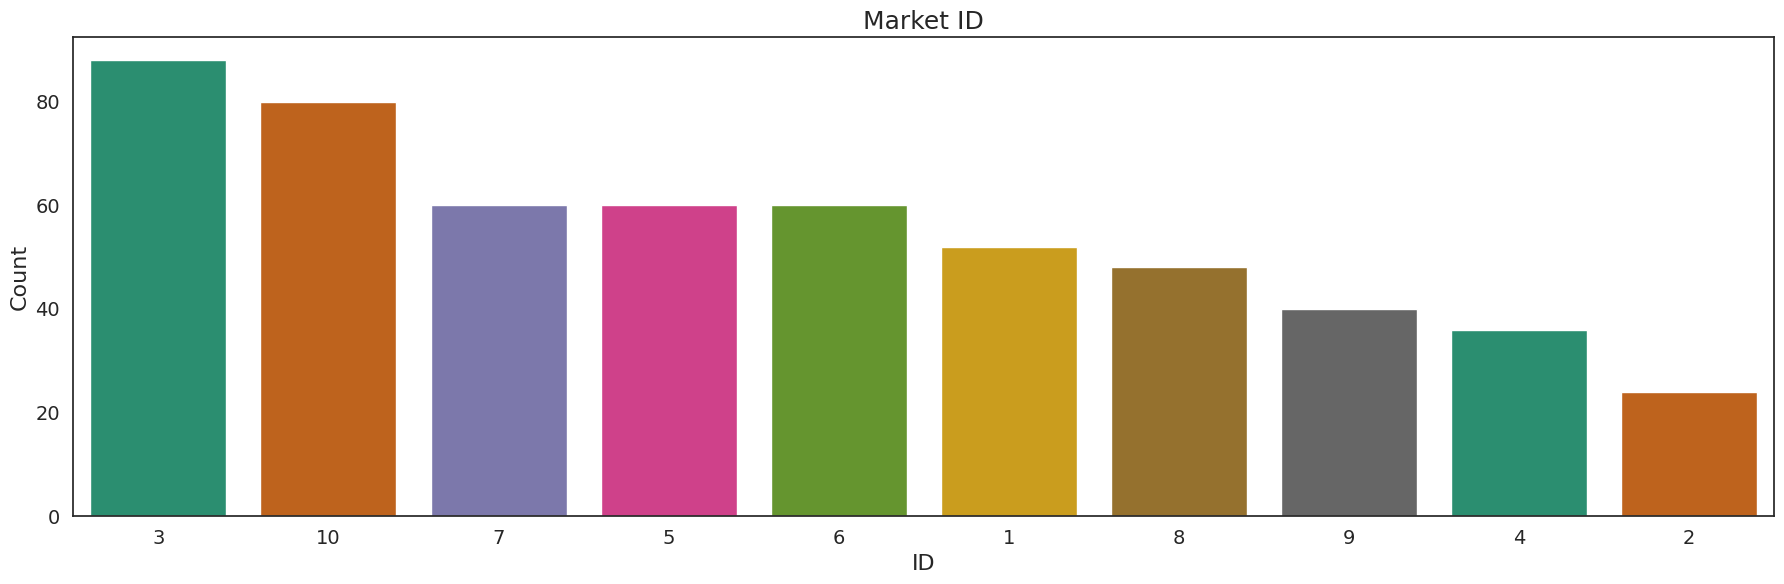

In [18]:
graphs.countplots_order(df      = ab,
                        columns = ["MarketID"],
                        titles  = ["Market ID"],
                        labels  = ["ID"],
                        ylabel  = "Count",
                        palette = "Dark2",
                        dim     = (18,6),
                        row     = 1,
                        col     = 1)

We don't have context or what these markets actually are.

### Market Size

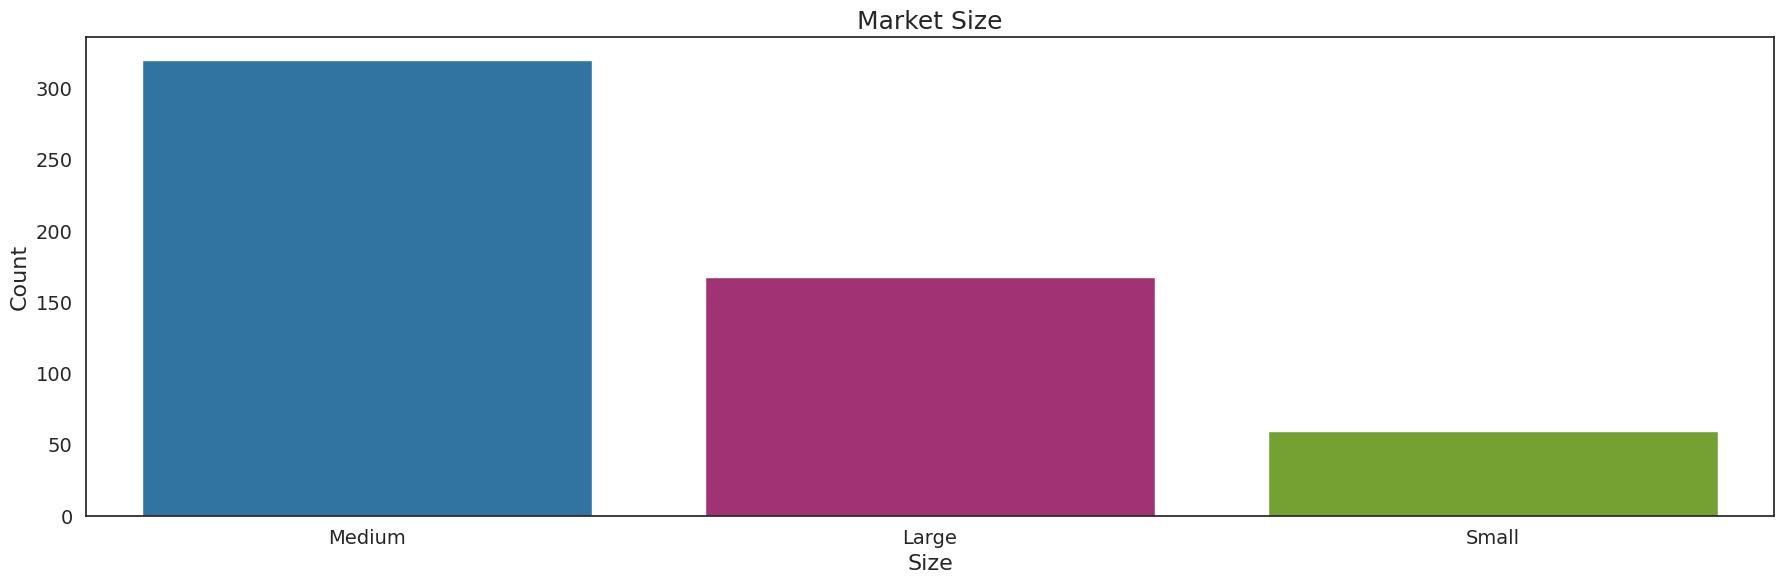

In [19]:
graphs.countplots_order(df      = ab,
                        columns = ["MarketSize"],
                        titles  = ["Market Size"],
                        labels  = ["Size"],
                        ylabel  = "Count",
                        palette = ["#1F77B4", "#B41F76", "#76B41F"],
                        dim     = (18,6),
                        row     = 1,
                        col     = 1)

Per Kaggle, size is determined by sales.

### Market Size By Promotion

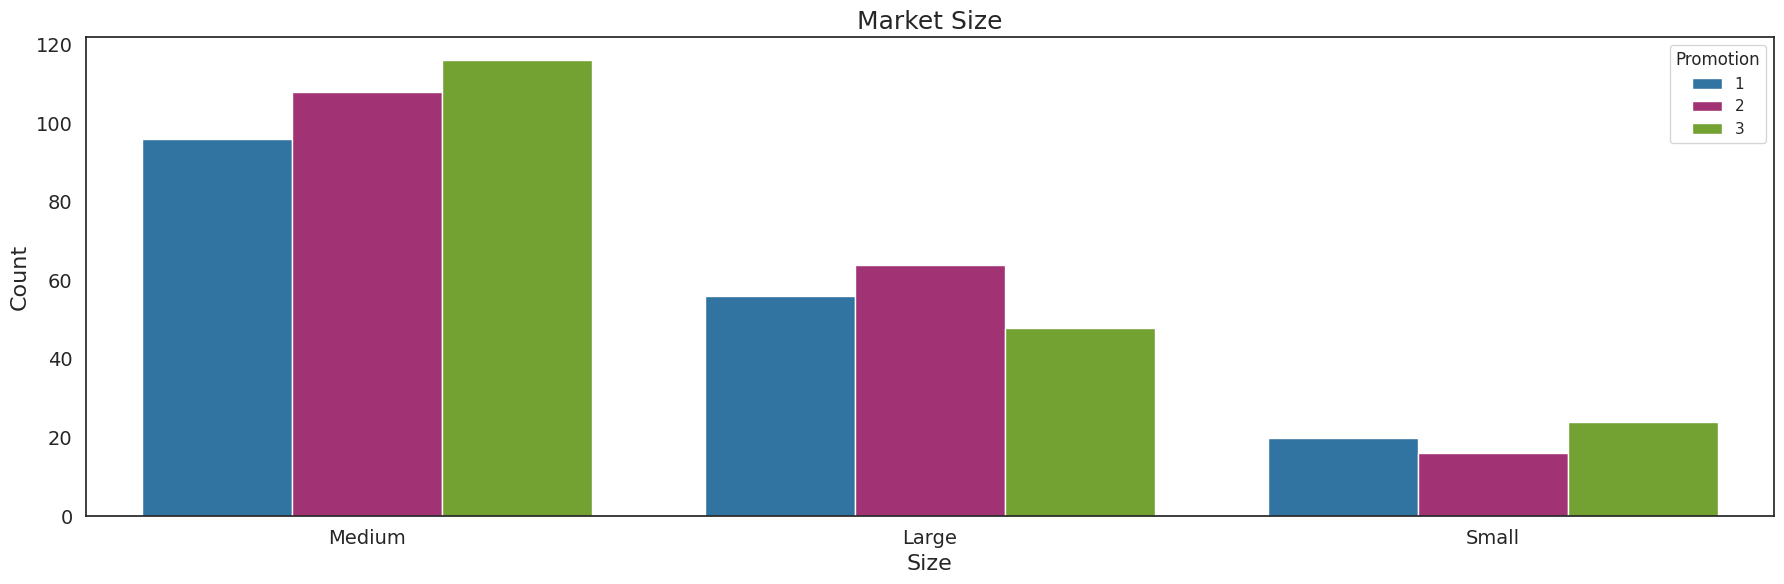

In [20]:
graphs.countplots_order(df      = ab,
                        columns = ["MarketSize"],
                        titles  = ["Market Size"],
                        labels  = ["Size"],
                        ylabel  = "Count",
                        palette = ["#1F77B4", "#B41F76", "#76B41F"],
                        dim     = (18,6),
                        hue     = "Promotion",
                        row     = 1,
                        col     = 1)

Interestingly, the promotions are not spread equally across the market sizes.

[Section Top](#Visualizations)

[Top](#Table-Of-Contents)

### Location ID

We're skipping a graph for this variable as there are too many values to reasonably graph and they all have a value of `4`.

### Store Age

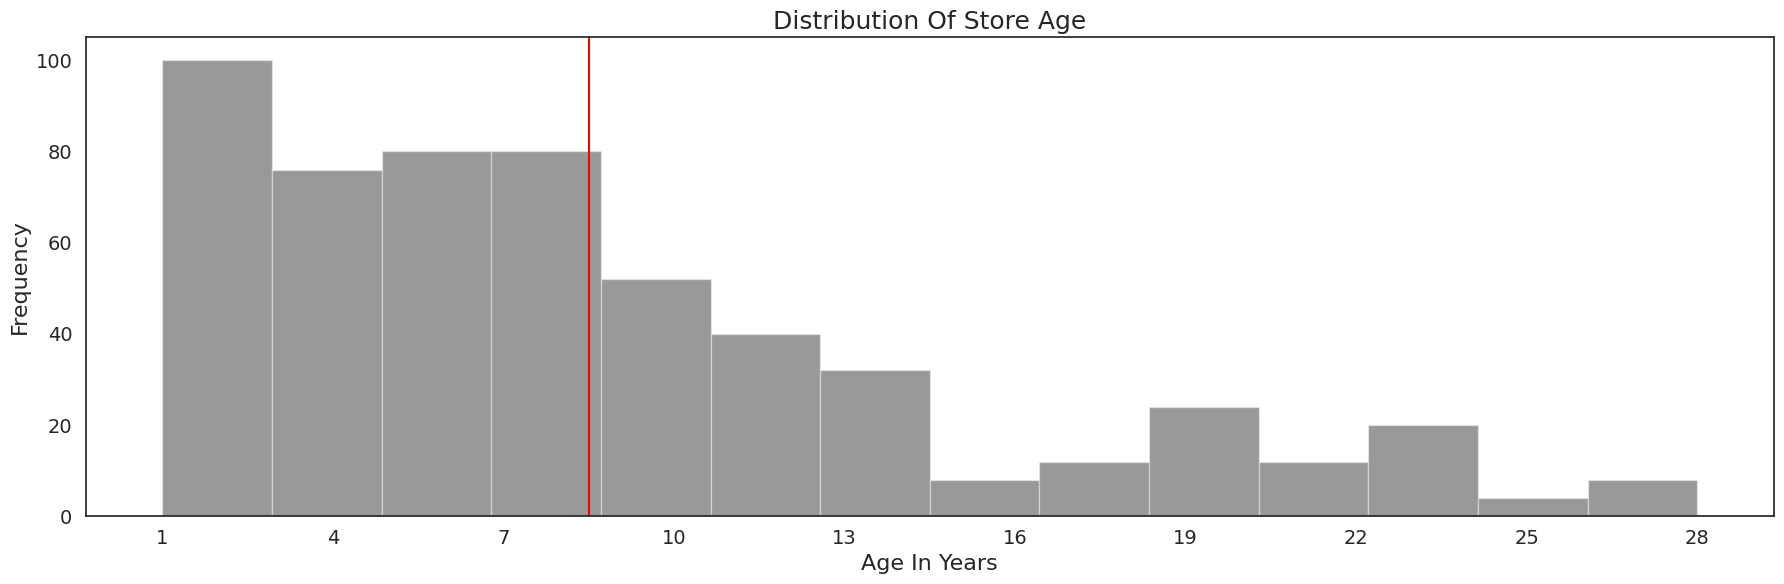

In [21]:
graphs.histograms(df      = ab,
                  columns = ["AgeOfStore"],
                  titles  = ["Store Age"],
                  labels  = ["Age In Years"],
                  ylabel  = "Frequency",
                  ticks   = [np.arange(1,30,3)],
                  dim     = (18,6),
                  row     = 1,
                  col     = 1)

The majority of stores are not particularly old, but we were surprised to see peaks at ages >16; we were think we would see a long tail to the right.

### Store Age By Promotion

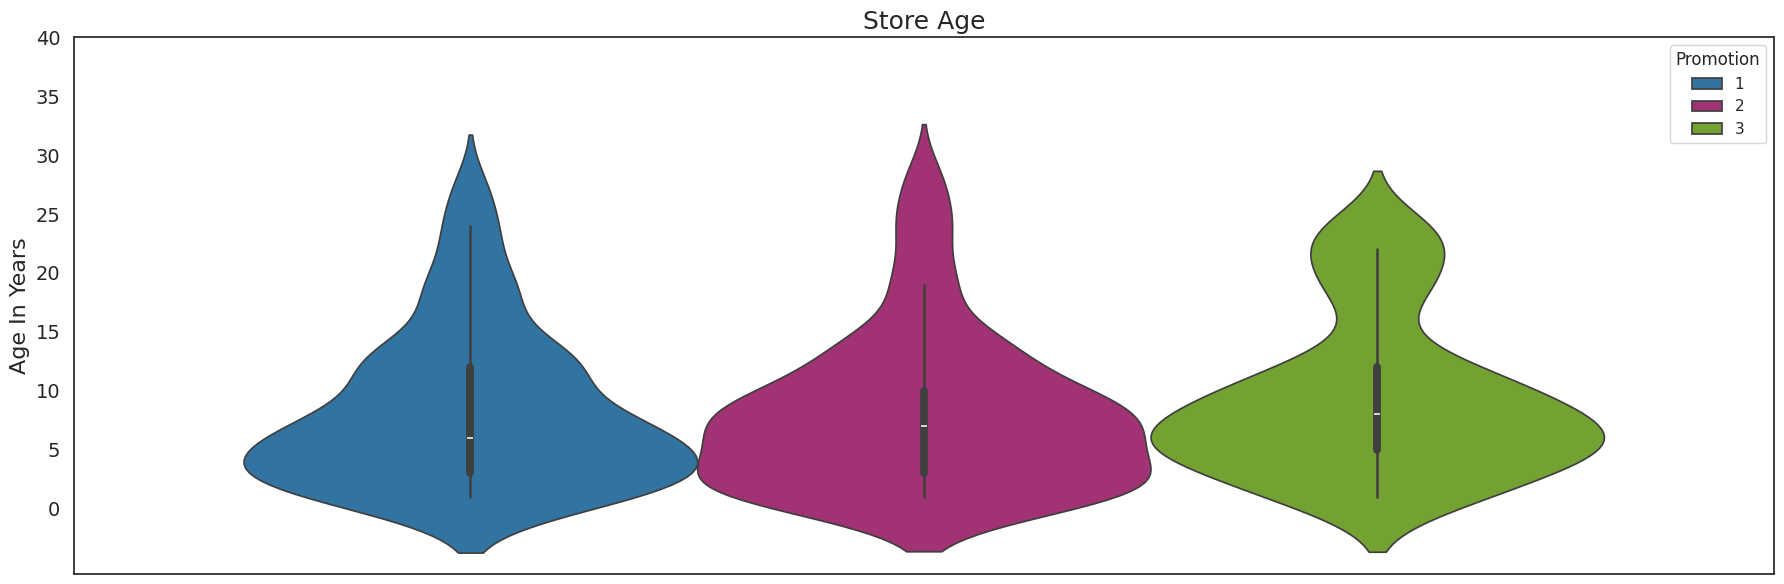

In [22]:
graphs.violinplots(df      = ab,
                   columns = ["AgeOfStore"],
                   titles  = ["Store Age"],
                   labels  = ["Age In Years"],
                   ticks   = [np.arange(0,45,5)],
                   palette = ["#1F77B4", "#B41F76", "#76B41F"],
                   hue     = "Promotion",
                   dim     = (18,6),
                   row     = 1,
                   col     = 1)

Overall, the store ages by promotion are consistent but were were suprised to see the spike in older ages in Promotion 3.

[Section Top](#Visualizations)

[Top](#Table-Of-Contents)

### Promotion

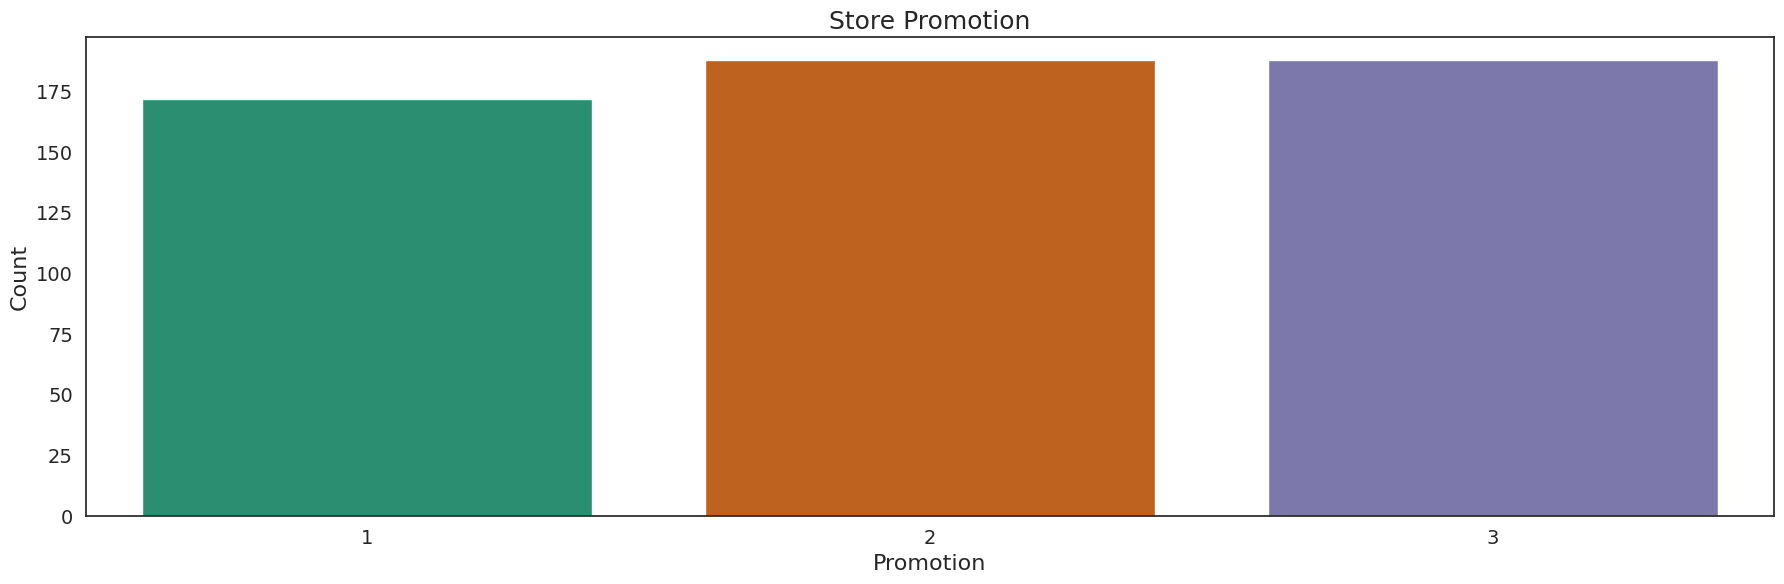

In [23]:
graphs.countplots(df      = ab,
                  columns = ["Promotion"],
                  titles  = ["Store Promotion"],
                  labels  = ["Promotion"],
                  ylabel  = "Count",
                  palette = "Dark2",
                  dim     = (18,6),
                  row     = 1,
                  col     = 1)

The promotions are roughly equal, which is good.

### Week

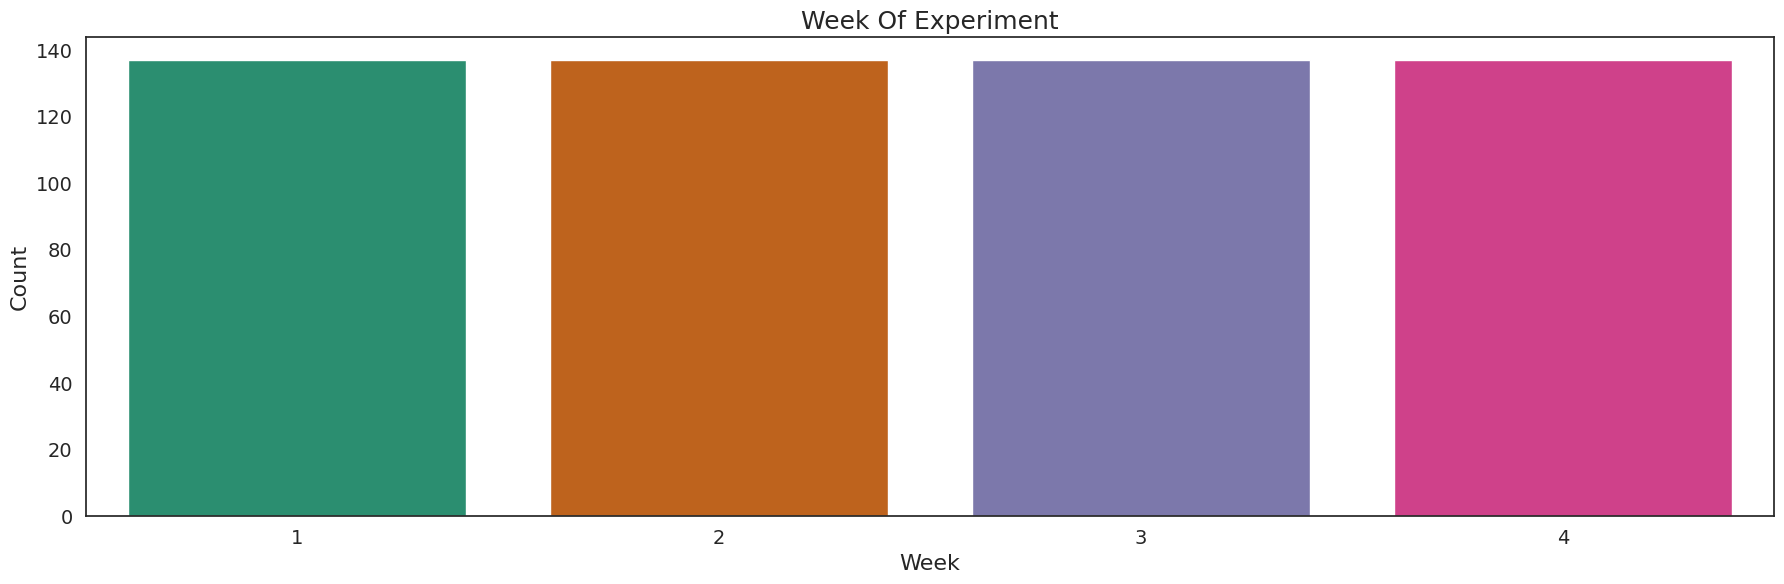

In [24]:
graphs.countplots(df      = ab,
                  columns = ["week"],
                  titles  = ["Week Of Experiment"],
                  labels  = ["Week"],
                  ylabel  = "Count",
                  palette = "Dark2",
                  dim     = (18,6),
                  row     = 1,
                  col     = 1)

### Sales By Week

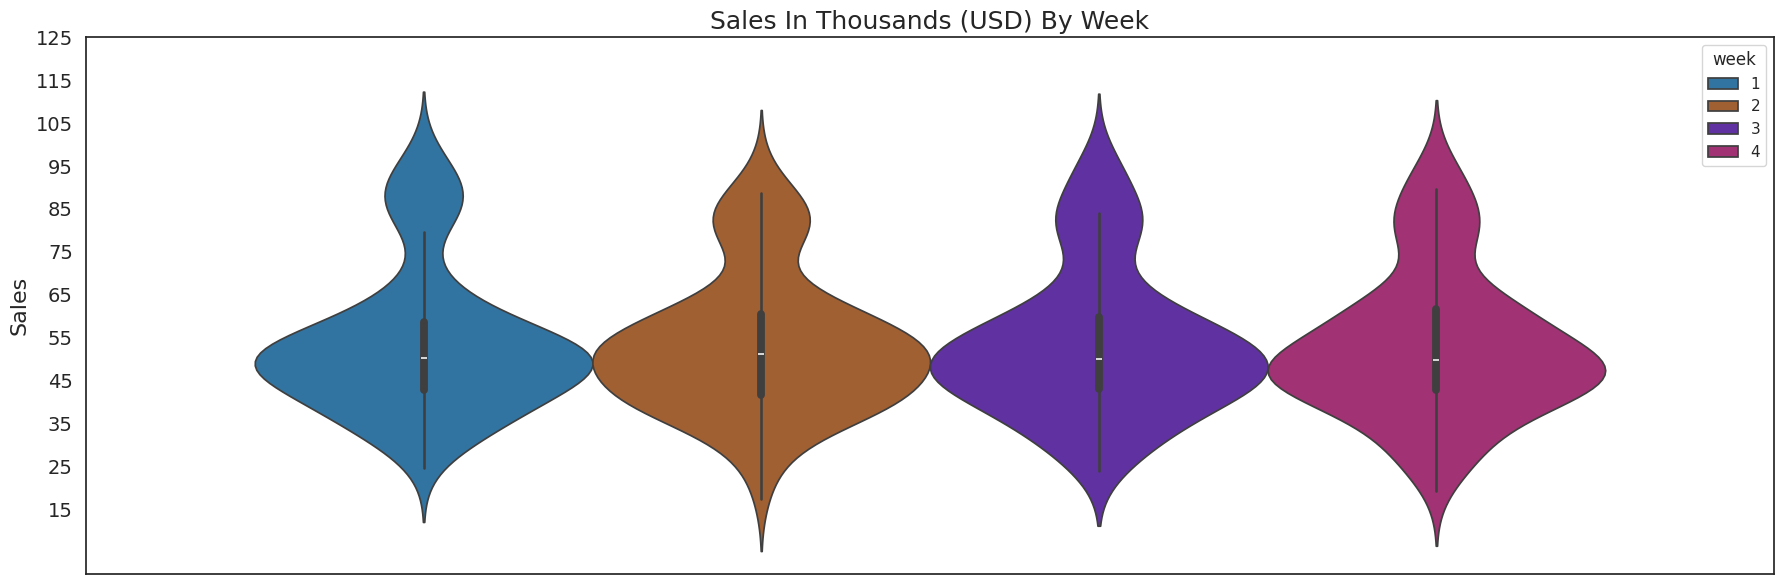

In [25]:
graphs.violinplots(df      = ab,
                   columns = ["SalesInThousands"],
                   titles  = ["Sales In Thousands (USD) By Week"],
                   labels  = ["Sales"],
                   ticks   = [np.arange(15,130,10)],
                   palette = ["#1F77B4", "#b45d1f", "#5d1fb4", "#B41F76"],
                   hue     = "week",
                   dim     = (18,6),
                   row     = 1,
                   col     = 1)

The sales were surprisingly consistent through the 4 weeks of the experiment.

[Section Top](#Visualizations)

[Top](#Table-Of-Contents)

### Sales

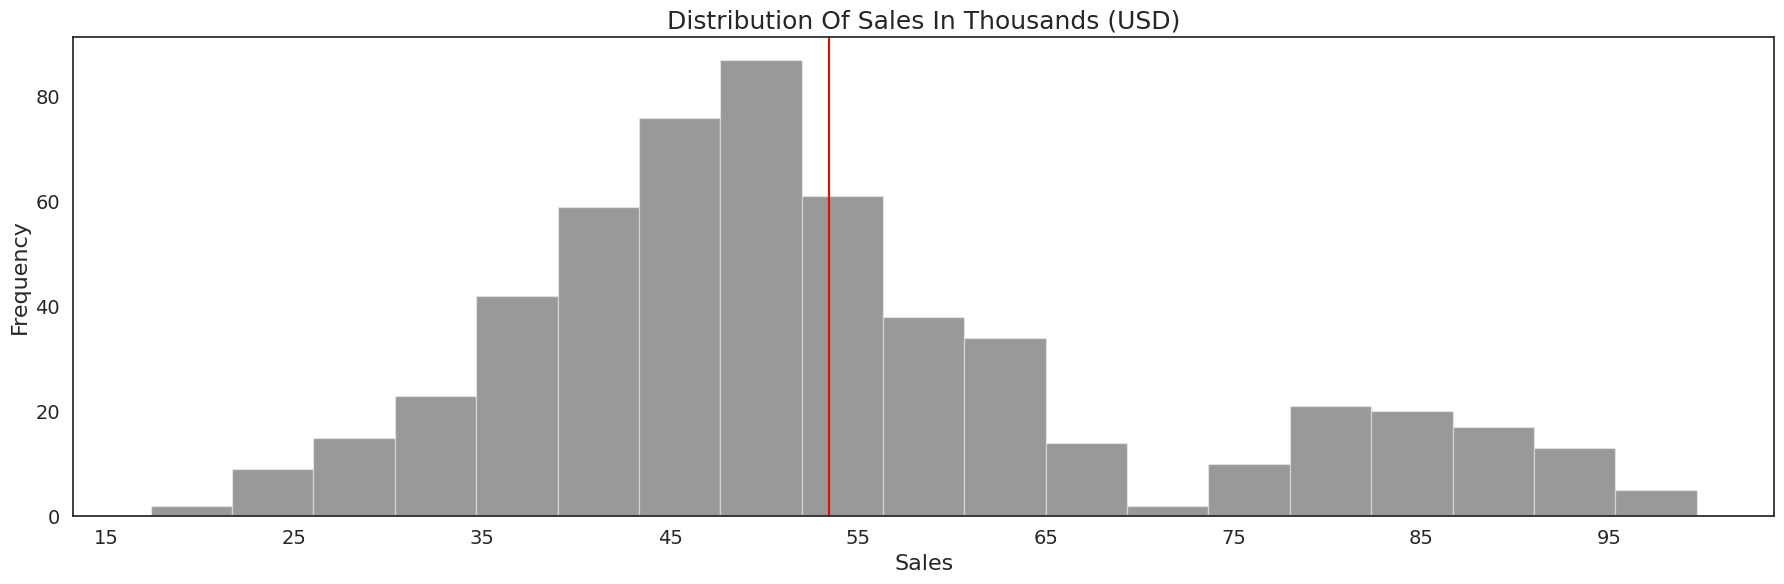

In [26]:
graphs.histograms(df      = ab,
                  columns = ["SalesInThousands"],
                  titles  = ["Sales In Thousands (USD)"],
                  labels  = ["Sales"],
                  ylabel  = "Frequency",
                  ticks   = [np.arange(15,100,10)],
                  dim     = (18,6),
                  row     = 1,
                  col     = 1)

Interestingly we almost have a bimodal distribution; we would have thought sales amounts would follow a normal distribution.

### Sales By Promotion

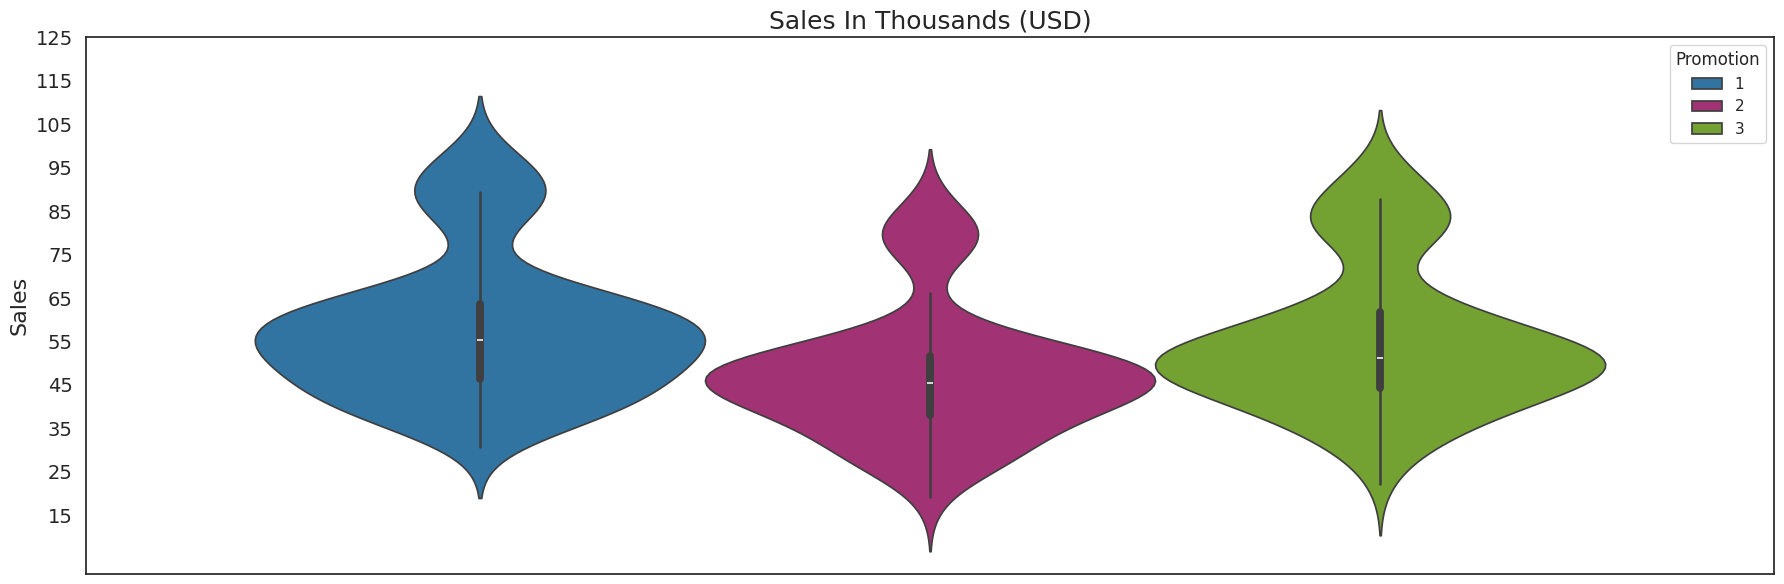

In [27]:
graphs.violinplots(df      = ab,
                   columns = ["SalesInThousands"],
                   titles  = ["Sales In Thousands (USD)"],
                   labels  = ["Sales"],
                   ticks   = [np.arange(15,130,10)],
                   palette = ["#1F77B4", "#B41F76", "#76B41F"],
                   hue     = "Promotion",
                   dim     = (18,6),
                   row     = 1,
                   col     = 1)

Visually, it looks like Promotion 2 was the worst performing and that Promotions 1 and 3 are roughly equal but we'll need to see results from our testing.

[Section Top](#Visualizations)

[Top](#Table-Of-Contents)

## Statistical Testing

### Hypotheses

- H<sub>0</sub>: The mean of all groups are the same
- H<sub>A</sub>: The mean of *at least* one group is different

----

Our testing will have 4 parts:

- Variance Homogeneity Testing: We are either going to use a one-way ANOVA or a nonparametric ANOVA test, but before we make a decision we need to test the homogeneity. To do so, we will use Levene's test: if we reject H<sub>0</sub> (population variance is equal) then we'll use the one-way ANOVA, otherwise we'll use a Kruskal ANOVA.

- ANOVA Testing: depending on the results of the Variance Homogeneity Testing, we'll run a one-way ANOVA or a Kruskal ANOVA. ANOVA is preferred with multiple levels; running multiple T-tests would increase our Type I error rate beyond 5%.

- Post-Hoc Analysis: The results of our ANOVA testing will only tell us if there's a difference or not in the means of the 3 promotions. In order to determine which promotion(s) is different, we need to compare each together. For this we'll be using Tukey's HSD (Honestly Significant Difference).

### Experiment Alpha

In [28]:
# We're using a standard alpha
alpha = 0.05

### Defining Promotion Groups

In [29]:
# Promotion subsets
ab_prom_1 = ab[ab["Promotion"] == 1]["SalesInThousands"]
ab_prom_2 = ab[ab["Promotion"] == 2]["SalesInThousands"]
ab_prom_3 = ab[ab["Promotion"] == 3]["SalesInThousands"]

### Variance Of Homogeneity Testing

In [30]:
# Executing Levene's Test
l_stat, p_value = stats.levene(ab_prom_1,
                               ab_prom_2,
                               ab_prom_3)

# Printing Results
print("----------Levene's Test Results----------")
print(f"L-statistic : {l_stat}")
print(f"P-value     : {p_value} \n")

# Printing our conclusion
print("----------Conclusions--------------------")
if p_value < alpha:
  print('Reject the Null: variances are not equal, apply one-way ANOVA.')
else:
  print('Fail to reject the Null: variances are equal, apply Kruskal-Willis.')

----------Levene's Test Results----------
L-statistic : 1.2696787527507418
P-value     : 0.2817514565692118 

----------Conclusions--------------------
Fail to reject the Null: variances are equal, apply Kruskal-Willis.


[Section Top](#Statistical-Testing)

[Top](#Table-Of-Contents)

### ANOVA Testing

In [31]:
# Executing the nonparametric ANOVA test
f_stat, p_value = stats.kruskal(ab_prom_1,
                                ab_prom_2,
                                ab_prom_3)

# Printing Results
print("----------ANOVA Results----------")
print(f"F-statistic : {f_stat}")
print(f"P-value     : {p_value} \n")

# Printing our conclusion
print("----------Conclusions------------")
if p_value < alpha:
  print('Reject the Null : population medians are not equal.')
else:
  print('Fail to reject the Null : population medians are equal.')

----------ANOVA Results----------
F-statistic : 53.29475169322799
P-value     : 2.6741866266697816e-12 

----------Conclusions------------
Reject the Null : population medians are not equal.


Since our p-value is lower than our alpha we can safely assume that there is a statistically significant difference in the medians of the 3 promotions. However, we need to know which is/are different. To do that, we will run a post-hoc test.

### Tukey's HSD

Tukey's HSD allows us to see how each group performed against each other.

In [32]:
# Executing Tukey's HSD
tukey = pairwise_tukeyhsd(endog  = ab["SalesInThousands"],
                          groups = ab['Promotion'],
                          alpha  = alpha)

# Creating a df out of the Tukey results and displaying
tukey_df = pd.DataFrame(data    = tukey._results_table.data[1:],
                        columns = tukey._results_table.data[0])

tukey_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2,-10.7696,0.0000,-14.7738,-6.7654,True
1,1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,2,3,8.0351,0.0000,4.1208,11.9493,True



**Promotion 2** performed the best

---

- Promotion 2 performed worse than Promotion 1;

- Promotion 1 performed effectively the same as Promotion 3;

- Promotion 3 performed better than Promotion 2.

To summarize performance: Promotion 1 > Promotion 3 > Promotion 2

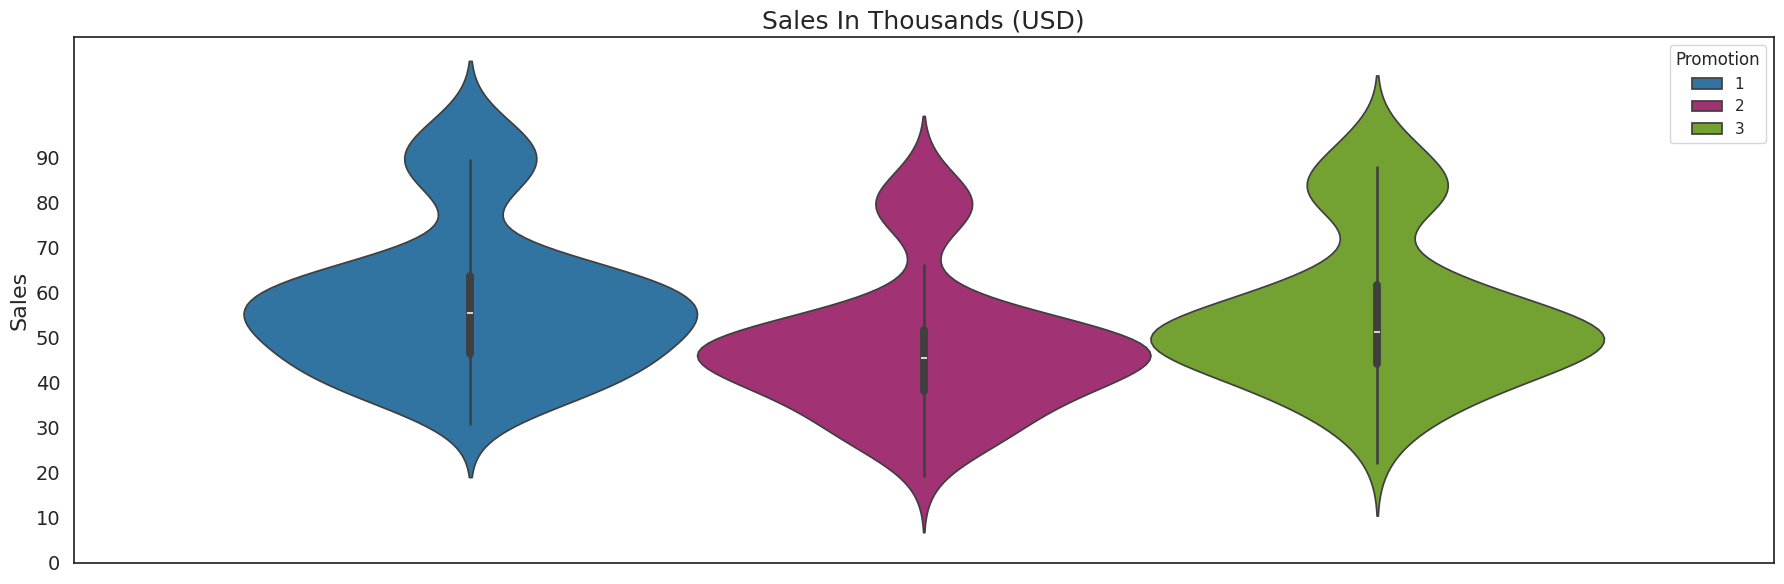

In [33]:
graphs.violinplots(df      = ab,
                   columns = ["SalesInThousands"],
                   titles  = ["Sales In Thousands (USD)"],
                   labels  = ["Sales"],
                   ticks   = [np.arange(0,100,10)],
                   palette = ["#1F77B4", "#B41F76", "#76B41F"],
                   hue     = "Promotion",
                   dim     = (18,6),
                   row     = 1,
                   col     = 1)

As we noted above, this chart of the sales by promotion confirms our results from our ANOVA and Tukey's HSD testing:

Promotion 1 > Promotion 3 > Promotion 2.

[Section Top](#Statistical-Testing)

[Top](#Table-Of-Contents)

## Further Statistical Testing

In additional to the primary A/B test, there are additional there is additonal ANOVA and statistical testing we would like to carry out on other columns.

### Additional ANOVA Testing

#### Market Size & Sales

We're concered that the size of the market may also be affecting the A/B test. Unfortunately, finding correlating between categorical and continunous data isn't easy, so we'll repeat the ANOVA testing.

In [34]:
# Market subsets
ab_market_s = ab[ab["MarketSize"] == "Small"]["SalesInThousands"]
ab_market_m = ab[ab["MarketSize"] == "Medium"]["SalesInThousands"]
ab_market_l = ab[ab["MarketSize"] == "Large"]["SalesInThousands"]


# Executing The Levene Test
l_stat, p_value = stats.levene(ab_market_s,
                               ab_market_m,
                               ab_market_l)

# Printing Results
print("----------Levene's Test Results----------")
print(f"L-statistic : {l_stat}")
print(f"P-value     : {p_value} \n")

# Printing our conclusion
print("----------Conclusions--------------------")
if p_value < alpha:
  print('Reject the Null: variances are not equal, apply one-way ANOVA.')
else:
  print('Fail to reject the Null: variances are equal, apply Kruskal-Willis.')

----------Levene's Test Results----------
L-statistic : 103.78867392674331
P-value     : 6.424815049825373e-39 

----------Conclusions--------------------
Reject the Null: variances are not equal, apply one-way ANOVA.


In [35]:
# Executing the one-way ANOVA test
f_stat, p_value = stats.f_oneway(ab_market_s,
                                 ab_market_m,
                                 ab_market_l)

# Printing Results
print("----------ANOVA Results----------")
print(f"F-statistic : {f_stat}")
print(f"P-value     : {p_value} \n")

# Printing our conclusion
print("----------Conclusions------------")
if p_value < alpha:
  print('Reject the Null : population medians are not equal.')
else:
  print('Fail to reject the Null : population medians are equal.')

----------ANOVA Results----------
F-statistic : 268.9130229516843
P-value     : 5.633818717740179e-82 

----------Conclusions------------
Reject the Null : population medians are not equal.


We can see that there is a statistically significant difference in the performance across the weeks.

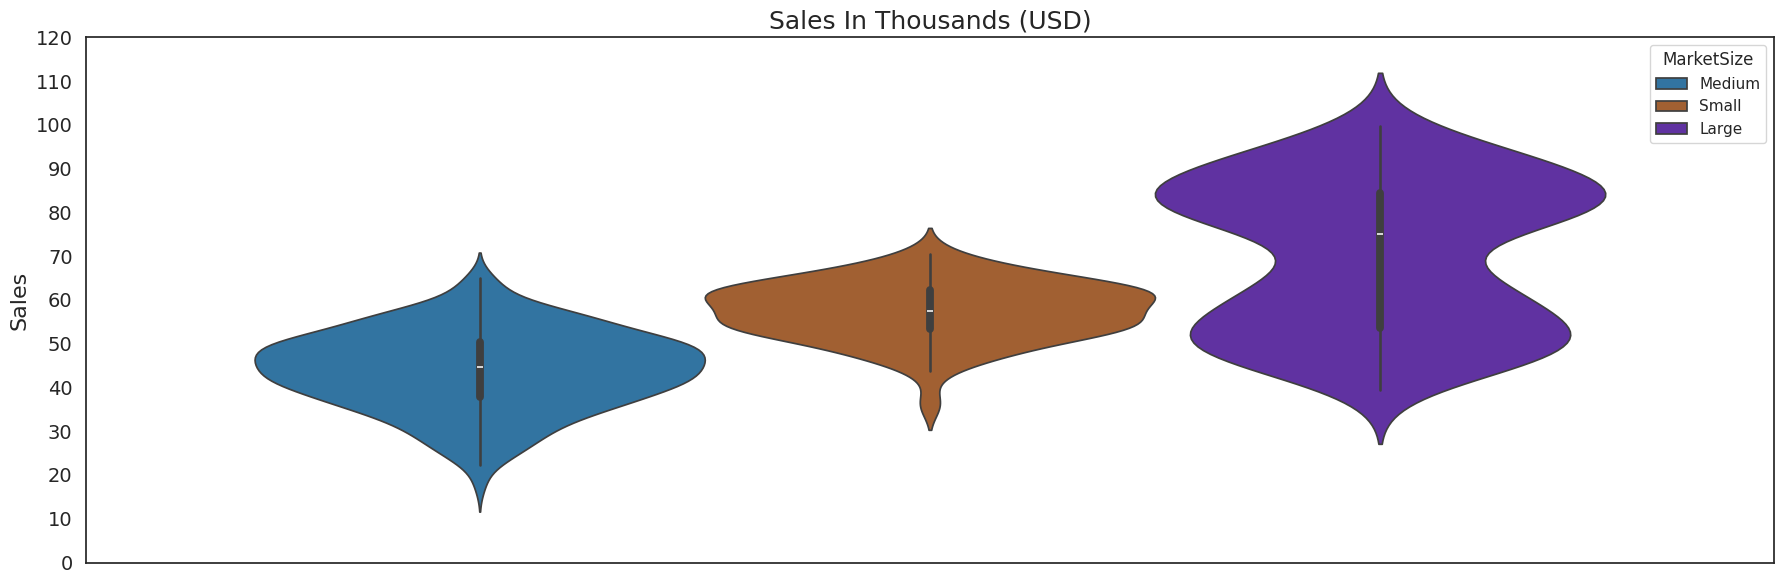

In [36]:
graphs.violinplots(df      = ab,
                   columns = ["SalesInThousands"],
                   titles  = ["Sales In Thousands (USD)"],
                   labels  = ["Sales"],
                   ticks   = [np.arange(0,130,10)],
                   palette = ["#1F77B4", "#b45d1f", "#5d1fb4", "#B41F76"],
                   hue     = "MarketSize",
                   dim     = (18,6),
                   row     = 1,
                   col     = 1)

It's clear that the market size has a pretty significant effect on sales, which makes sense to us. However, it is interesting that small has better sales than medium: we would have expected large > medium > small.

Additionally, the large market size appears to be bimodal unlike the other two market sizes.

#### Week & Sales

We're concered that the week of the experiment may also be afecting the A/B test. Unfortunately, finding correlating between categorical and continunous data isn't easy, so we'll essentially repeat the ANOVA testing.

In [37]:
# Market subsets
ab_week_1 = ab[ab["week"] == 1]["SalesInThousands"]
ab_week_2 = ab[ab["week"] == 2]["SalesInThousands"]
ab_week_3 = ab[ab["week"] == 3]["SalesInThousands"]
ab_week_4 = ab[ab["week"] == 4]["SalesInThousands"]


# Executing The Levene Test
l_stat, p_value = stats.levene(ab_week_1,
                               ab_week_2,
                               ab_week_3,
                               ab_week_4)

# Printing Results
print("----------Levene's Test Results----------")
print(f"L-statistic : {l_stat}")
print(f"P-value     : {p_value} \n")

# Printing our conclusion
print("----------Conclusions--------------------")
if p_value < alpha:
  print('Reject the Null: variances are not equal, apply one-way ANOVA.')
else:
  print('Fail to reject the Null: variances are equal, apply Kruskal-Willis.')

----------Levene's Test Results----------
L-statistic : 0.1716173998899853
P-value     : 0.9155658393949756 

----------Conclusions--------------------
Fail to reject the Null: variances are equal, apply Kruskal-Willis.


In [38]:
# Executing the nonparametric ANOVA test
f_stat, p_value = stats.kruskal(ab_week_1,
                                ab_week_2,
                                ab_week_3,
                                ab_week_4)

# Printing Results
print("----------ANOVA Results----------")
print(f"F-statistic : {f_stat}")
print(f"P-value     : {p_value} \n")

# Printing our conclusion
print("----------Conclusions------------")
if p_value < alpha:
  print('Reject the Null : population medians are not equal.')
else:
  print('Fail to reject the Null : population medians are equal.')

----------ANOVA Results----------
F-statistic : 0.07100980987332281
P-value     : 0.9950732177171205 

----------Conclusions------------
Fail to reject the Null : population medians are equal.


We can see that the sales numbers remain consistent across the 4 weeks of the experiment.

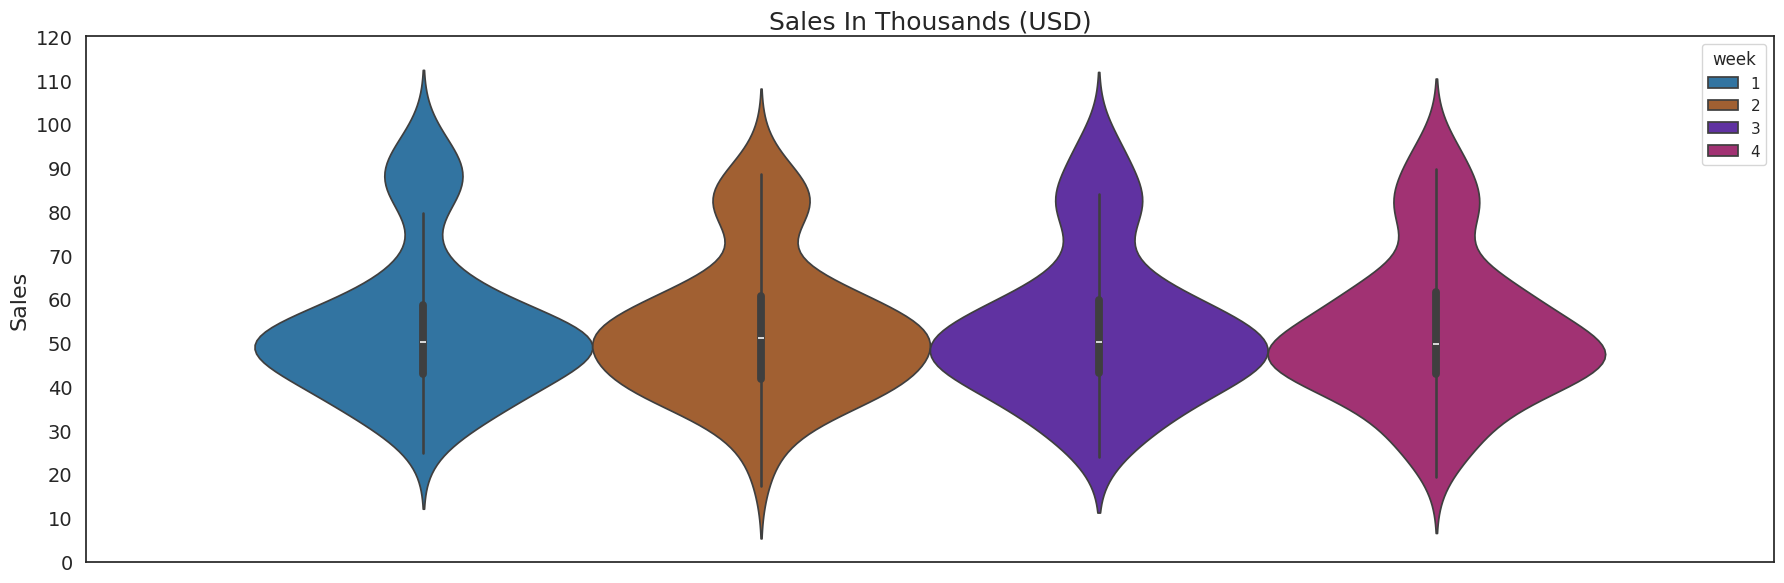

In [39]:
graphs.violinplots(df      = ab,
                   columns = ["SalesInThousands"],
                   titles  = ["Sales In Thousands (USD)"],
                   labels  = ["Sales"],
                   ticks   = [np.arange(0,130,10)],
                   palette = ["#1F77B4", "#b45d1f", "#5d1fb4", "#B41F76"],
                   hue     = "week",
                   dim     = (18,6),
                   row     = 1,
                   col     = 1)

The sales figures are clearly consistent across the 4 weeks of the experiment.

[Section Top](#Additional-Statistical-Testing)

[Top](#Table-Of-Contents)

### Statistical Tests

#### Correlation Between Age & Sales

We noted that we have 2 truly numeric columns `AgeOfStore` and `SalesInThousands` and were concerned that they may be other factors affecting the A/B test. To rule out any effect of store age on the A/B test and because they're both continuous, we decided to calculate Pearson's R for the two columns.

In [40]:
sf.pearsonr_dataframe(df      = ab,
                      x       = "AgeOfStore",
                      y       = ["SalesInThousands"],
                      columns = ["Sales In Thousands (USD)"],
                      alpha   = alpha)

,Coefficient,P-Value,Significant
Sales In Thousands (USD),-0.02853,0.50506,False


Since the p-value is greater than alpha, we can conclude that the age of the store does not correlate to sales.

#### Correlation Ordinal Columns & Promotion

There are additonal ordinal columns that could be affecting the A/B test, so to rule out possible effects we calculated Spearman's rho for them against the promotion.

We chose Spearman's rho is essentially a rank based version of Pearson's R. Considering that `MarketSize`, `week`, and `Promotion` are ordered/ordinal, we felt that this test is appropriate.

In [41]:
# Market size mapping
market_dict = {"Small":0,"Medium":1, "Large":2}

# Creating a copy of our DF & mapping
ab_var               = ab.copy()
ab_var["MarketSize"] = ab_var["MarketSize"].map(market_dict)

# Calculating spearman's rho and p_value
stat_1, p_1 = stats.spearmanr(ab_var["MarketSize"], ab_var["week"])
stat_2, p_2 = stats.spearmanr(ab_var["MarketSize"], ab_var["Promotion"])
stat_3, p_3 = stats.spearmanr(ab_var["week"], ab_var["Promotion"])

# Printing results
print("----------Correlation Results----------")
print(f"The correlation between market size and week is          : {stat_1} with a p-value of {p_1}")
print(f"The correlation between market size and the promotion is : {stat_2} with a p-value of {p_2}")
print(f"The correlation between the week and the promotion is    : {stat_3} with a p-value of {p_3}")

----------Correlation Results----------
The correlation between market size and week is          : 0.0 with a p-value of 1.0
The correlation between market size and the promotion is : -0.05883866395206149 with a p-value of 0.16899988085718606
The correlation between the week and the promotion is    : 0.0 with a p-value of 1.0


Based on the results of this, we are confident that `MarketSize` & `week` are not correlated with themselves or with `Promotion`.

[Section Top](#Statistical-Testing)

## Conclusions

Key Take-Aways:

- Promotions 1 & 3 outperform Promotion 2;

- However there is not a statistically significant difference between Promotions 1 & 3;

- Market size, especially large market size, is a very strong driver of sales.

Additional Take-Aways:

- Sales were consistent across the 4 weeks;

- Store age is not correlated with sales

- Market size, week, & promotion are not correlated.


[Top](#Table-Of-Contents)